## Importing necessary libraries

In [1]:
# Data Manipulation and Visualization
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PyTorch, Torchvision, and vision related libraries
import torch
import torch.nn as nn
import torch.nn.functional as f
import torchvision
import torch_optimizer as tor_optim
from torch.optim import Adam, RMSprop, SGD
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.models import resnet50, shufflenetv2

# OpenCV, Pillow, SKImage, Albumentations
import cv2
import PIL
import albumentations as al
from albumentations.pytorch import ToTensorV2
from PIL import Image
from skimage import io

# Logging and inbuilt libraries
import wandb # weights and biases library
import pickle
import random, os, sys, logging
import ipywidgets as widgets
from tqdm import tqdm
from ipywidgets import interact,interactive,interact_manual
import warnings
warnings.filterwarnings("ignore")

logging.propagate = False
logging.getLogger().setLevel(logging.ERROR)


## Reading Images

In [2]:
# Specify the folder names required for generating paths below
train_good = ['images', 'train', 'good']
train_bad  = ['images', 'train', 'bad']
test_good  = ['images', 'test', 'good']
test_bad   = ['images', 'test', 'bad']

In [3]:
# Generate required paths for the train and test folders
owd = os.getcwd()
train_good = os.path.join(owd,*train_good)
train_bad  = os.path.join(owd,*train_bad)
test_good  = os.path.join(owd,*test_good)
test_bad   = os.path.join(owd,*test_bad)

print(f'Train Good Images Directory: {train_good}')
print(f'Train Bad Images Directory: {train_bad}')
print(f'Test Good Images Directory: {test_good}')
print(f'Test Bad Images Directory: {test_bad}')

Train Good Images Directory: C:\Users\abhis\OneDrive - Indiana University\Documents\INDIANA UNIVERSITY\3rd Semester\Inteligent SE\project\images\train\good
Train Bad Images Directory: C:\Users\abhis\OneDrive - Indiana University\Documents\INDIANA UNIVERSITY\3rd Semester\Inteligent SE\project\images\train\bad
Test Good Images Directory: C:\Users\abhis\OneDrive - Indiana University\Documents\INDIANA UNIVERSITY\3rd Semester\Inteligent SE\project\images\test\good
Test Bad Images Directory: C:\Users\abhis\OneDrive - Indiana University\Documents\INDIANA UNIVERSITY\3rd Semester\Inteligent SE\project\images\test\bad


In [4]:
for infile in os.listdir(train_good):
    print(infile)

IMG_20170614_120303886.jpg
IMG_20170614_120308063.jpg
IMG_20170614_120315387.jpg
IMG_20170614_120327108.jpg
IMG_20170614_120340187.jpg
IMG_20170614_120348169.jpg
IMG_20170614_120351584.jpg
IMG_20170614_120423701.jpg
IMG_20170614_120436012.jpg
IMG_20170614_120442497.jpg
IMG_20170614_120505848.jpg
IMG_20170614_120507501.jpg
IMG_20170614_121217958_HDR.jpg
IMG_20170614_121222933.jpg
IMG_20170614_121244752.jpg
IMG_20170614_121303102.jpg
IMG_20170614_121306857.jpg
IMG_20170614_121311304_HDR.jpg
IMG_20170614_121320991.jpg
IMG_20170614_121325200.jpg
IMG_20170614_121333238.jpg
IMG_20170614_121335628.jpg
IMG_20170614_121338413.jpg
IMG_20170614_121352119.jpg
IMG_20170614_121405394.jpg
IMG_20170614_121408361.jpg
IMG_20170614_121413552.jpg
IMG_20170614_121416645.jpg
IMG_20170614_121430764.jpg
IMG_20170614_121436051.jpg
IMG_20170614_121450851.jpg
IMG_20170614_121455251.jpg
IMG_20170614_121500979.jpg
IMG_20170614_121509688.jpg
IMG_20170614_121511538.jpg
IMG_20170614_121514611.jpg
IMG_20170614_1215250

In [14]:
for infile in os.listdir(train_bad):
    print(infile)

IMG-20170615-WA0019.jpg
IMG-20170615-WA0021.jpg
IMG-20170615-WA0022.jpg
IMG-20170615-WA0023.jpg
IMG-20170615-WA0024.jpg
IMG-20170615-WA0028.jpg
IMG-20170615-WA0029.jpg
IMG_20170614_121001420.jpg
IMG_20170614_121006794.jpg
IMG_20170614_121016213.jpg
IMG_20170614_121123065.jpg
IMG_20170614_121133283.jpg
IMG_20170614_122811483.jpg
IMG_20170614_123326776.jpg
IMG_20170614_123336573.jpg
IMG_20170614_123640280.jpg
IMG_20170614_123726394.jpg
IMG_20170614_123734511.jpg
IMG_20170614_123739455.jpg
IMG_20170614_123742334.jpg
IMG_20170614_123747833_HDR.jpg
IMG_20170614_130814967.jpg
IMG_20170614_131001970.jpg
IMG_20170614_131331353.jpg
IMG_20170614_131430610.jpg
IMG_20170614_131433180_HDR.jpg
IMG_20170614_131515933.jpg
IMG_20170614_131528301.jpg


In [15]:
for infile in os.listdir(test_good):
    print(infile)

IMG_20170614_121222933.jpg
IMG_20170614_121316675_HDR.jpg
IMG_20170614_121430764.jpg
IMG_20170614_121557174.jpg
IMG_20170614_122025190.jpg
IMG_20170614_122030779.jpg
IMG_20170614_122033442.jpg
IMG_20170614_122738699.jpg
IMG_20170614_123313011.jpg
IMG_20170614_123557814.jpg
IMG_20170614_123858125.jpg
IMG_20170614_123904444.jpg
IMG_20170614_123910333.jpg
IMG_20170614_124246257.jpg
IMG_20170614_130609503.jpg


In [16]:
for infile in os.listdir(test_bad):
    im = Image.open(os.path.join(test_bad,infile))
    #im.show()
    print(infile)
    

IMG-20170615-WA0020.jpg
IMG-20170615-WA0021.jpg
IMG-20170615-WA0022.jpg
IMG-20170615-WA0023.jpg
IMG_20170614_121006794.jpg
IMG_20170614_121016213.jpg
IMG_20170614_121126744.jpg
IMG_20170614_121133283.jpg
IMG_20170614_121143540.jpg
IMG_20170614_123640280.jpg
IMG_20170614_123739455.jpg
IMG_20170614_123747833_HDR.jpg
IMG_20170614_130725994.jpg
IMG_20170614_130814967.jpg
IMG_20170614_131531821.jpg


## Image Pre-Processing and Augmentation

In [4]:
# Resizing Images
HEIGHT = 128
WIDTH  = 128

In [18]:
# Defining Transformations required for augmenting the images
transform = al.Compose([
            al.Resize(width=WIDTH, height=HEIGHT,p=1.0),
    
            al.Rotate(limit=90, p=1.0),
    
            al.HorizontalFlip(p=0.3),
    
            al.VerticalFlip(p=0.2),
    
            al.ColorJitter(contrast=2, p=0.2),
    
            al.ColorJitter(brightness=2, p=0.2),
    
            al.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            p=1.0),
])

In [19]:
# Augmented Images Directories
aug_train_good = 'C:/Users/abhij/OneDrive - Indiana University/3rd Semester/Intro to Intelligent Systems/Project/images/aug_train/good'
aug_train_bad  = 'C:/Users/abhij/OneDrive - Indiana University/3rd Semester/Intro to Intelligent Systems/Project/images/aug_train/bad'

In [ ]:
def augment(IMG_DIR, AUG_PATH_IMAGE, num):
    print("*******************Augmentation Started*****************************")
    for i, infile in enumerate(os.listdir(IMG_DIR)):
        image = cv2.imread(os.path.join(IMG_DIR,infile))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        for j in range(num):
            transformed = transform(image=image)
            transformed_image = transformed['image']
            transformed_image = transformed_image*255
            transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB)
            fname = AUG_PATH_IMAGE + '/' + infile[:-4]+ '_'+str(j)+'.jpg'
            cv2.imwrite(fname, transformed_image)
    print()
    print("*******************Augmentation Finished*****************************")

In [ ]:
augment(train_good, aug_train_good, 30)

*******************Augmentation Started*****************************

*******************Augmentation Finished*****************************


In [ ]:
augment(train_bad, aug_train_bad, 125)

*******************Augmentation Started*****************************

*******************Augmentation Finished*****************************


In [ ]:
# Creating a csv file for train data to generate labels for all the good and bad images

# labels_traindf = pd.DataFrame()

# arr_img_tr = []
# arr_lab_tr = []
# for i in os.listdir(aug_train_good):
#     arr_img_tr.append(i)
#     arr_lab_tr.append(1)

# for i in os.listdir(aug_train_bad):
#     arr_img_tr.append(i)
#     arr_lab_tr.append(0)
    
# labels_traindf['Image_fnames'] = arr_img_tr
# labels_traindf['labels']       = arr_lab_tr
# labels_traindf.to_csv('train.csv', index=False)

In [ ]:
# Creating a csv file for test data to generate labels for all the good and bad images

# labels_testdf  = pd.DataFrame()

# arr_img_te = []
# arr_lab_te = []
# for i in os.listdir(test_good):
#     arr_img_te.append(i)
#     arr_lab_te.append(1)

# for i in os.listdir(test_bad):
#     arr_img_te.append(i)
#     arr_lab_te.append(0)
    
# labels_testdf['Image_fnames'] = arr_img_te
# labels_testdf['labels']       = arr_lab_te
# labels_testdf.to_csv('test.csv', index=False)

In [ ]:
# Creating a Dataset class 
# class WeldDataset(Dataset):
#     def __init__(self, csv_file, root_dir, transform=None):
#         self.annotations = pd.read_csv(csv_file)
#         self.root_dir    = root_dir
#         self.transform   = transform
        
#     def __len__(self):
#         return len(self.annotations)   # train_set -> 8930, test_set -> 30
        
#     # Return a specific image and corresponding label to that image
#     def __getitem__(self, index):
#         # Index -> we don't have to choose it, PyTorch does it for us
#         img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
#         image    = io.imread(img_path)
#         y_label  = torch.tensor(int(self.annotations.iloc[index, 1]))
        
#         if self.transform:
#             image = self.tranform(image)
            
#         return (image, ylabel)   # returns 1 image and 1 corresponding label to that image

In [ ]:
# Loading the data
# train_dataset = WeldDataset(csv_file = 'train.csv', root_dir = 'train_set', transform = train_transform)
# test_dataset  = WeldDataset(csv_file = 'test.csv', root_dir = 'test_set', transform = test_transform)

# train_loader = DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True)
# test_loader  = DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=True)

In [5]:
# Defining classes related to weld defects
classes = ['bad', 'good']

for labels in enumerate(classes):
    print(labels)

(0, 'bad')
(1, 'good')


In [6]:
# Defining final transformation to be applied to train and test images for creating dataloaders
# Normalization values are specific to the ResNet models, because ResNet models have been pre-trained on these values

train_transform = transforms.Compose([
        transforms.Resize((WIDTH, HEIGHT)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize((WIDTH, HEIGHT)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

#### Hyperparameters

In [7]:
# Initializing the values
in_channel    = 3
num_classes   = 2
learning_rate = 0.01
batch_size    = 32
num_epochs    = 20

#### Loading Datasets and Creating DataLoaders

In [8]:
# Load Datasets
train_dataset = ImageFolder("images/aug_train", train_transform)
test_dataset = ImageFolder("images/test", test_transform)

print(f'Train Dataset: {train_dataset} \nTest Dataset: {test_dataset}')
print(f'Train Dataset Labels: {train_dataset.class_to_idx} \nTest Dataset Labels: {test_dataset.class_to_idx}')

# Create train and test dataloaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

Train Dataset: Dataset ImageFolder
    Number of datapoints: 8930
    Root location: images/aug_train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           ) 
Test Dataset: Dataset ImageFolder
    Number of datapoints: 30
    Root location: images/test
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Train Dataset Labels: {'bad': 0, 'good': 1} 
Test Dataset Labels: {'bad': 0, 'good': 1}


## ResNet 50 with Adam Optimizer

In [12]:
# Setting the device as gpu or cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
device

'cuda'

In [16]:
# Loading pre-trained ResNet 50 model
model = resnet50(pretrained = True)

In [17]:
# Chaning the output layer of the resnet 50 model
model.fc = nn.Linear(in_features=2048, out_features=2)
model = model.to(device)

In [18]:
# Checking if the model is on cuda/gpu or not
next(model.parameters()).is_cuda

True

#### Optimizer and Loss Function

In [19]:
# Initializing Optimizer
optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=0.0001)

# Initializing Loss Function
loss_fn = nn.CrossEntropyLoss()

In [135]:
# os.environ['CUDA_VISIBLE_DEVICES']='2, 3'

#### Training and Evaluate the Model

In [20]:
def train_model(model):
    train_loss     = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        with tqdm(train_loader, unit='batch') as te:
            for i, (image, label) in enumerate(te):
                image = image.to(device)
                label = label.to(device)

                pred = model(image)

                loss = loss_fn(pred, label)

                # train_prob = train_prob.cpu() # Assigining train_probabilites to cpu to prevent maxing out of CUDA memory
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                
                if i % 70 == 69:    # print and store every 70 mini-batches: 4 times per epoch
                    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 70:.3f}')
                    train_loss.append(running_loss / 70)
                    
                    running_loss = 0.0
                    
    return model, train_loss

In [21]:
def test_model(model):
    with torch.no_grad():
        correct = 0
        total = 0
        for test_image, test_label in test_loader:
            test_image = test_image.to(device)
            test_label = test_label.to(device)
            test_prob  = model(test_image)
            # test_prob  = test_prob.cpu() 

            test_pred  = torch.max(test_prob, 1).indices
    #         print(test_label, test_pred)
    #         test_acc   += int(torch.sum(test_pred == test_label))
            total += test_label.size(0)
            correct += (test_pred == test_label).sum().item()

        #ep_test_acc = test_acc / len(test_loader)

        print(f'Accuracy of the network on the test images: {100 * correct // total} %')

In [22]:
resnet_adam, train_loss_adam = train_model(model)

 25%|███████████████████▊                                                          | 71/280 [00:17<00:43,  4.84batch/s]

[1,    70] loss: 0.946


 50%|██████████████████████████████████████▊                                      | 141/280 [00:31<00:25,  5.47batch/s]

[1,   140] loss: 0.673


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:44<00:12,  5.66batch/s]

[1,   210] loss: 0.650


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:56<00:00,  4.91batch/s]


[1,   280] loss: 0.654


 25%|███████████████████▊                                                          | 71/280 [00:12<00:37,  5.64batch/s]

[2,    70] loss: 0.601


 50%|██████████████████████████████████████▊                                      | 141/280 [00:25<00:25,  5.52batch/s]

[2,   140] loss: 0.591


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:38<00:12,  5.51batch/s]

[2,   210] loss: 0.575


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:51<00:00,  5.40batch/s]


[2,   280] loss: 0.637


 25%|███████████████████▌                                                          | 70/280 [00:13<00:37,  5.65batch/s]

[3,    70] loss: 0.584


 50%|██████████████████████████████████████▊                                      | 141/280 [00:27<00:27,  5.08batch/s]

[3,   140] loss: 0.555


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:41<00:14,  4.74batch/s]

[3,   210] loss: 0.513


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:54<00:00,  5.15batch/s]


[3,   280] loss: 0.558


 25%|███████████████████▊                                                          | 71/280 [00:13<00:37,  5.52batch/s]

[4,    70] loss: 0.564


 50%|██████████████████████████████████████▊                                      | 141/280 [00:25<00:24,  5.77batch/s]

[4,   140] loss: 0.515


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:37<00:12,  5.57batch/s]

[4,   210] loss: 0.507


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:49<00:00,  5.62batch/s]


[4,   280] loss: 0.444


 25%|███████████████████▊                                                          | 71/280 [00:12<00:36,  5.69batch/s]

[5,    70] loss: 0.456


 50%|██████████████████████████████████████▊                                      | 141/280 [00:24<00:24,  5.78batch/s]

[5,   140] loss: 0.423


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:36<00:11,  5.88batch/s]

[5,   210] loss: 0.395


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:52<00:00,  5.33batch/s]


[5,   280] loss: 0.395


 25%|███████████████████▊                                                          | 71/280 [00:14<00:36,  5.78batch/s]

[6,    70] loss: 0.445


 50%|██████████████████████████████████████▌                                      | 140/280 [00:28<00:25,  5.40batch/s]

[6,   140] loss: 0.394


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:43<00:16,  4.14batch/s]

[6,   210] loss: 0.379


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:00<00:00,  4.60batch/s]


[6,   280] loss: 0.361


 25%|███████████████████▊                                                          | 71/280 [00:17<00:50,  4.18batch/s]

[7,    70] loss: 0.364


 50%|██████████████████████████████████████▌                                      | 140/280 [00:34<00:37,  3.78batch/s]

[7,   140] loss: 0.356


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:52<00:18,  3.88batch/s]

[7,   210] loss: 0.353


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:10<00:00,  3.97batch/s]


[7,   280] loss: 0.361


 25%|███████████████████▌                                                          | 70/280 [00:17<00:48,  4.30batch/s]

[8,    70] loss: 0.355


 50%|██████████████████████████████████████▌                                      | 140/280 [00:34<00:35,  3.92batch/s]

[8,   140] loss: 0.377


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:51<00:17,  4.09batch/s]

[8,   210] loss: 0.327


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:08<00:00,  4.06batch/s]


[8,   280] loss: 0.327


 25%|███████████████████▌                                                          | 70/280 [00:17<00:52,  3.98batch/s]

[9,    70] loss: 0.336


 50%|██████████████████████████████████████▊                                      | 141/280 [00:31<00:23,  5.87batch/s]

[9,   140] loss: 0.327


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:44<00:12,  5.72batch/s]

[9,   210] loss: 0.305


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:56<00:00,  4.92batch/s]


[9,   280] loss: 0.331


 25%|███████████████████▊                                                          | 71/280 [00:13<00:44,  4.67batch/s]

[10,    70] loss: 0.299


 50%|██████████████████████████████████████▊                                      | 141/280 [00:25<00:25,  5.41batch/s]

[10,   140] loss: 0.315


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:39<00:12,  5.74batch/s]

[10,   210] loss: 0.291


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:51<00:00,  5.43batch/s]


[10,   280] loss: 0.276


 25%|███████████████████▊                                                          | 71/280 [00:12<00:37,  5.60batch/s]

[11,    70] loss: 0.263


 50%|██████████████████████████████████████▌                                      | 140/280 [00:25<00:25,  5.39batch/s]

[11,   140] loss: 0.251


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:38<00:11,  5.85batch/s]

[11,   210] loss: 0.297


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:51<00:00,  5.46batch/s]


[11,   280] loss: 0.301


 25%|███████████████████▊                                                          | 71/280 [00:13<00:38,  5.48batch/s]

[12,    70] loss: 0.372


 50%|██████████████████████████████████████▊                                      | 141/280 [00:26<00:24,  5.64batch/s]

[12,   140] loss: 0.288


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:38<00:12,  5.54batch/s]

[12,   210] loss: 0.264


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:52<00:00,  5.35batch/s]


[12,   280] loss: 0.253


 25%|███████████████████▊                                                          | 71/280 [00:13<00:35,  5.90batch/s]

[13,    70] loss: 0.270


 50%|██████████████████████████████████████▌                                      | 140/280 [00:26<00:28,  4.90batch/s]

[13,   140] loss: 0.258


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:39<00:14,  4.96batch/s]

[13,   210] loss: 0.246


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:52<00:00,  5.38batch/s]


[13,   280] loss: 0.280


 25%|███████████████████▊                                                          | 71/280 [00:13<00:37,  5.62batch/s]

[14,    70] loss: 0.243


 50%|██████████████████████████████████████▊                                      | 141/280 [00:26<00:23,  5.82batch/s]

[14,   140] loss: 0.250


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:38<00:11,  5.80batch/s]

[14,   210] loss: 0.263


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:50<00:00,  5.53batch/s]


[14,   280] loss: 0.239


 25%|███████████████████▊                                                          | 71/280 [00:12<00:36,  5.71batch/s]

[15,    70] loss: 0.241


 50%|██████████████████████████████████████▊                                      | 141/280 [00:25<00:23,  5.83batch/s]

[15,   140] loss: 0.240


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:38<00:11,  5.76batch/s]

[15,   210] loss: 0.277


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:50<00:00,  5.53batch/s]


[15,   280] loss: 0.309


 25%|███████████████████▊                                                          | 71/280 [00:12<00:35,  5.82batch/s]

[16,    70] loss: 0.247


 50%|██████████████████████████████████████▊                                      | 141/280 [00:25<00:24,  5.58batch/s]

[16,   140] loss: 0.240


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:38<00:11,  5.77batch/s]

[16,   210] loss: 0.229


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:50<00:00,  5.59batch/s]


[16,   280] loss: 0.225


 25%|███████████████████▌                                                          | 70/280 [00:12<00:42,  4.95batch/s]

[17,    70] loss: 0.237


 50%|██████████████████████████████████████▌                                      | 140/280 [00:24<00:24,  5.74batch/s]

[17,   140] loss: 0.221


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:37<00:12,  5.73batch/s]

[17,   210] loss: 0.208


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:49<00:00,  5.65batch/s]


[17,   280] loss: 0.218


 25%|███████████████████▊                                                          | 71/280 [00:12<00:36,  5.68batch/s]

[18,    70] loss: 0.219


 50%|██████████████████████████████████████▊                                      | 141/280 [00:24<00:24,  5.74batch/s]

[18,   140] loss: 0.202


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:38<00:13,  5.07batch/s]

[18,   210] loss: 0.205


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:51<00:00,  5.43batch/s]


[18,   280] loss: 0.210


 25%|███████████████████▌                                                          | 70/280 [00:12<00:46,  4.54batch/s]

[19,    70] loss: 0.210


 50%|██████████████████████████████████████▊                                      | 141/280 [00:25<00:23,  5.85batch/s]

[19,   140] loss: 0.216


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:37<00:12,  5.69batch/s]

[19,   210] loss: 0.187


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:49<00:00,  5.68batch/s]


[19,   280] loss: 0.219


 25%|███████████████████▌                                                          | 70/280 [00:12<00:47,  4.39batch/s]

[20,    70] loss: 0.233


 50%|██████████████████████████████████████▊                                      | 141/280 [00:25<00:23,  5.89batch/s]

[20,   140] loss: 0.202


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:37<00:11,  5.84batch/s]

[20,   210] loss: 0.211


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:48<00:00,  5.74batch/s]

[20,   280] loss: 0.208


In [23]:
test_model(resnet_adam)

Accuracy of the network on the test images: 83 %


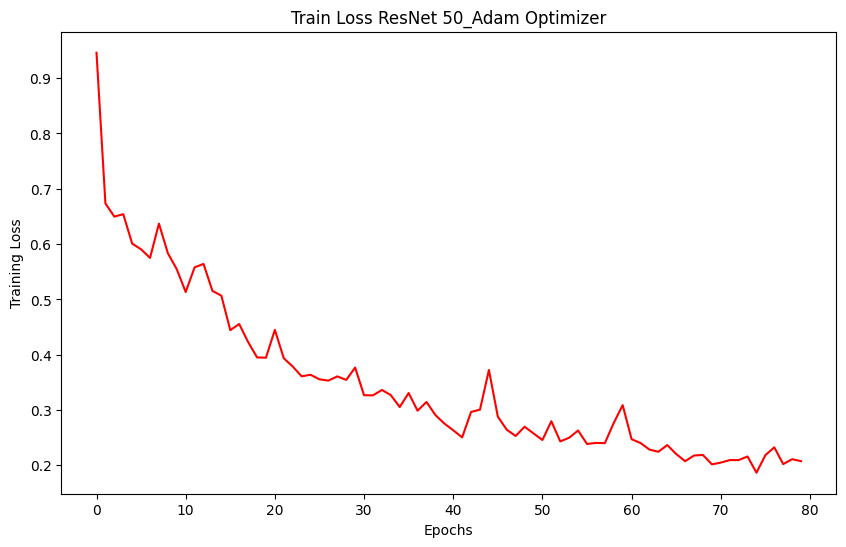

In [24]:
# Train Loss v Test Accuracy Plot_ResNet50_Adam
plt.figure(figsize=(10,6))
plt.plot(train_loss_adam, color='r')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Train Loss ResNet 50_Adam Optimizer')
plt.show()

#### Saving Model

In [56]:
# Saving ResNet50 model with Adam optimizer
torch.save(model.state_dict(), os.path.join(owd, 'ResNet50_Adam.pth'))

#### Loading Model

In [ ]:
# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH))
# model.to(device)
# Make sure to call input = input.to(device) on any input tensors that you feed to the model

## ResNet 50 -> SGD with Momentum Optimizer

In [9]:
def train_model(model):
    train_loss     = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        with tqdm(train_loader, unit='batch') as te:
            for i, (image, label) in enumerate(te):
                image = image.to(device)
                label = label.to(device)

                pred = model(image)

                loss = loss_fn(pred, label)

                # train_prob = train_prob.cpu() # Assigining train_probabilites to cpu to prevent maxing out of CUDA memory
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                
                if i % 70 == 69:    # print and store every 70 mini-batches: 4 times per epoch
                    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 70:.3f}')
                    train_loss.append(running_loss / 70)
                    
                    running_loss = 0.0
                    
    return model, train_loss

In [10]:
def test_model(model):
    with torch.no_grad():
        correct = 0
        total = 0
        for test_image, test_label in test_loader:
            test_image = test_image.to(device)
            test_label = test_label.to(device)
            test_prob  = model(test_image)
            # test_prob  = test_prob.cpu() 

            test_pred  = torch.max(test_prob, 1).indices
    #         print(test_label, test_pred)
    #         test_acc   += int(torch.sum(test_pred == test_label))
            total += test_label.size(0)
            correct += (test_pred == test_label).sum().item()

        #ep_test_acc = test_acc / len(test_loader)

        print(f'Accuracy of the network on the test images: {100 * correct // total} %')

In [13]:
model = resnet50(pretrained = True)
model.fc = nn.Linear(in_features=2048, out_features=2)
model = model.to(device)

# Initializing Optimizer
optimizer = SGD(model.parameters(), momentum = 0.5, lr=learning_rate, weight_decay=0.0001)

# Initializing Loss Function
loss_fn = nn.CrossEntropyLoss()

In [14]:
resnet_sgd, train_loss_sgd = train_model(model)

 25%|███████████████████▌                                                          | 70/280 [00:21<00:54,  3.84batch/s]

[1,    70] loss: 0.179


 50%|██████████████████████████████████████▌                                      | 140/280 [00:39<00:35,  3.91batch/s]

[1,   140] loss: 0.062


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:56<00:17,  4.05batch/s]

[1,   210] loss: 0.043


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:14<00:00,  3.76batch/s]


[1,   280] loss: 0.038


 25%|███████████████████▌                                                          | 70/280 [00:17<00:52,  3.99batch/s]

[2,    70] loss: 0.107


 50%|██████████████████████████████████████▌                                      | 140/280 [00:34<00:34,  4.10batch/s]

[2,   140] loss: 0.035


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:51<00:18,  3.88batch/s]

[2,   210] loss: 0.036


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:08<00:00,  4.09batch/s]


[2,   280] loss: 0.044


 25%|███████████████████▊                                                          | 71/280 [00:17<00:47,  4.41batch/s]

[3,    70] loss: 0.107


 50%|██████████████████████████████████████▌                                      | 140/280 [00:34<00:34,  4.04batch/s]

[3,   140] loss: 0.040


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:51<00:16,  4.30batch/s]

[3,   210] loss: 0.026


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:08<00:00,  4.11batch/s]


[3,   280] loss: 0.035


 25%|███████████████████▌                                                          | 70/280 [00:17<00:46,  4.49batch/s]

[4,    70] loss: 0.051


 50%|██████████████████████████████████████▌                                      | 140/280 [00:34<00:33,  4.12batch/s]

[4,   140] loss: 0.023


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:50<00:18,  3.88batch/s]

[4,   210] loss: 0.021


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:07<00:00,  4.16batch/s]


[4,   280] loss: 0.044


 25%|███████████████████▊                                                          | 71/280 [00:17<00:50,  4.15batch/s]

[5,    70] loss: 0.143


 50%|██████████████████████████████████████▌                                      | 140/280 [00:35<00:35,  3.93batch/s]

[5,   140] loss: 0.044


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:52<00:17,  3.91batch/s]

[5,   210] loss: 0.027


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:09<00:00,  4.03batch/s]


[5,   280] loss: 0.031


 25%|███████████████████▌                                                          | 70/280 [00:17<00:51,  4.07batch/s]

[6,    70] loss: 0.069


 50%|██████████████████████████████████████▌                                      | 140/280 [00:34<00:31,  4.41batch/s]

[6,   140] loss: 0.025


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:51<00:18,  3.76batch/s]

[6,   210] loss: 0.015


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:08<00:00,  4.08batch/s]


[6,   280] loss: 0.017


 25%|███████████████████▌                                                          | 70/280 [00:16<00:51,  4.06batch/s]

[7,    70] loss: 0.012


 50%|██████████████████████████████████████▌                                      | 140/280 [00:34<00:34,  4.05batch/s]

[7,   140] loss: 0.009


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:51<00:17,  3.91batch/s]

[7,   210] loss: 0.009


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:08<00:00,  4.09batch/s]


[7,   280] loss: 0.010


 25%|███████████████████▌                                                          | 70/280 [00:17<00:50,  4.19batch/s]

[8,    70] loss: 0.008


 50%|██████████████████████████████████████▌                                      | 140/280 [00:34<00:35,  3.94batch/s]

[8,   140] loss: 0.015


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:51<00:16,  4.31batch/s]

[8,   210] loss: 0.008


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:08<00:00,  4.08batch/s]


[8,   280] loss: 0.011


 25%|███████████████████▌                                                          | 70/280 [00:16<00:47,  4.46batch/s]

[9,    70] loss: 0.010


 50%|██████████████████████████████████████▌                                      | 140/280 [00:33<00:34,  4.09batch/s]

[9,   140] loss: 0.011


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:50<00:14,  4.62batch/s]

[9,   210] loss: 0.006


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:07<00:00,  4.17batch/s]


[9,   280] loss: 0.053


 25%|███████████████████▌                                                          | 70/280 [00:17<00:53,  3.95batch/s]

[10,    70] loss: 0.029


 50%|██████████████████████████████████████▌                                      | 140/280 [00:34<00:35,  3.93batch/s]

[10,   140] loss: 0.012


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:51<00:17,  3.94batch/s]

[10,   210] loss: 0.012


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:07<00:00,  4.12batch/s]


[10,   280] loss: 0.018


 25%|███████████████████▌                                                          | 70/280 [00:16<00:55,  3.78batch/s]

[11,    70] loss: 0.016


 50%|██████████████████████████████████████▌                                      | 140/280 [00:34<00:34,  4.05batch/s]

[11,   140] loss: 0.012


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:51<00:17,  4.01batch/s]

[11,   210] loss: 0.008


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:08<00:00,  4.09batch/s]


[11,   280] loss: 0.008


 25%|███████████████████▌                                                          | 70/280 [00:16<00:53,  3.91batch/s]

[12,    70] loss: 0.006


 50%|██████████████████████████████████████▌                                      | 140/280 [00:33<00:35,  3.98batch/s]

[12,   140] loss: 0.006


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:51<00:17,  3.95batch/s]

[12,   210] loss: 0.033


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:07<00:00,  4.13batch/s]


[12,   280] loss: 0.029


 25%|███████████████████▊                                                          | 71/280 [00:17<00:46,  4.50batch/s]

[13,    70] loss: 0.278


 50%|██████████████████████████████████████▌                                      | 140/280 [00:33<00:33,  4.17batch/s]

[13,   140] loss: 0.083


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:51<00:14,  4.64batch/s]

[13,   210] loss: 0.044


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:07<00:00,  4.14batch/s]


[13,   280] loss: 0.069


 25%|███████████████████▌                                                          | 70/280 [00:16<00:52,  3.98batch/s]

[14,    70] loss: 0.110


 50%|██████████████████████████████████████▌                                      | 140/280 [00:33<00:31,  4.40batch/s]

[14,   140] loss: 0.026


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:50<00:17,  4.00batch/s]

[14,   210] loss: 0.025


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:05<00:00,  4.29batch/s]


[14,   280] loss: 0.031


 25%|███████████████████▊                                                          | 71/280 [00:13<00:37,  5.60batch/s]

[15,    70] loss: 0.021


 50%|██████████████████████████████████████▌                                      | 140/280 [00:26<00:25,  5.51batch/s]

[15,   140] loss: 0.014


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:39<00:17,  3.93batch/s]

[15,   210] loss: 0.010


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:54<00:00,  5.14batch/s]


[15,   280] loss: 0.016


 25%|███████████████████▌                                                          | 70/280 [00:13<00:40,  5.15batch/s]

[16,    70] loss: 0.059


 50%|██████████████████████████████████████▌                                      | 140/280 [00:26<00:25,  5.50batch/s]

[16,   140] loss: 0.013


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:40<00:15,  4.48batch/s]

[16,   210] loss: 0.011


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:52<00:00,  5.33batch/s]


[16,   280] loss: 0.073


 25%|███████████████████▊                                                          | 71/280 [00:12<00:36,  5.79batch/s]

[17,    70] loss: 0.027


 50%|██████████████████████████████████████▊                                      | 141/280 [00:24<00:23,  5.79batch/s]

[17,   140] loss: 0.011


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:36<00:11,  5.75batch/s]

[17,   210] loss: 0.007


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:48<00:00,  5.72batch/s]


[17,   280] loss: 0.011


 25%|███████████████████▊                                                          | 71/280 [00:12<00:36,  5.77batch/s]

[18,    70] loss: 0.011


 50%|██████████████████████████████████████▌                                      | 140/280 [00:24<00:29,  4.67batch/s]

[18,   140] loss: 0.012


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:41<00:18,  3.89batch/s]

[18,   210] loss: 0.011


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:58<00:00,  4.76batch/s]


[18,   280] loss: 0.093


 25%|███████████████████▌                                                          | 70/280 [00:17<00:53,  3.91batch/s]

[19,    70] loss: 0.065


 50%|██████████████████████████████████████▌                                      | 140/280 [00:33<00:33,  4.16batch/s]

[19,   140] loss: 0.010


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:51<00:17,  3.96batch/s]

[19,   210] loss: 0.011


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:08<00:00,  4.11batch/s]


[19,   280] loss: 0.012


 25%|███████████████████▌                                                          | 70/280 [00:17<00:53,  3.94batch/s]

[20,    70] loss: 0.008


 50%|██████████████████████████████████████▌                                      | 140/280 [00:33<00:33,  4.14batch/s]

[20,   140] loss: 0.005


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:51<00:17,  3.93batch/s]

[20,   210] loss: 0.003


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:07<00:00,  4.12batch/s]

[20,   280] loss: 0.010


In [25]:
test_model(resnet_sgd)

Accuracy of the network on the test images: 96 %


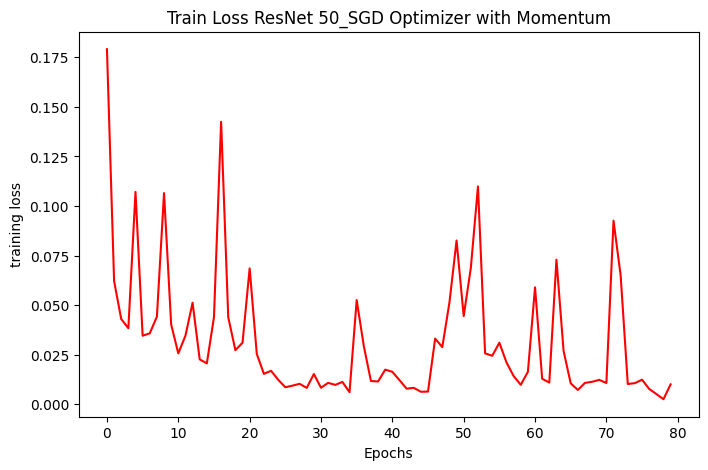

In [29]:
# Train Loss v Test Accuracy Plot_SGD with Momentum
plt.figure(figsize=(8,5))
plt.plot(train_loss_sgd, color='r')
plt.xlabel('Epochs')
plt.ylabel('training loss')
plt.title('Train Loss ResNet 50_SGD Optimizer with Momentum')
plt.show()

In [70]:
# Saving ResNet50 model -> SGD Optimizer with momentum
torch.save(resnet_sgd.state_dict(), os.path.join(owd, 'ResNet50_SGD_Momentum.pth'))

## ResNet 50 -> RMSProp Optimizer

In [32]:
model_rms = resnet50(pretrained = True)
model_rms.fc = nn.Linear(in_features=2048, out_features=2)
model_rms = model_rms.to(device)

# Initializing Optimizer
optimizer = RMSprop(model_rms.parameters(), lr=0.01)

# Initializing Loss Function
loss_fn = nn.CrossEntropyLoss()

In [33]:
resnet_prop, train_loss_rms = train_model(model_rms)

 25%|███████████████████▌                                                          | 70/280 [00:16<00:51,  4.05batch/s]

[1,    70] loss: 1.912


 50%|██████████████████████████████████████▌                                      | 140/280 [00:34<00:33,  4.18batch/s]

[1,   140] loss: 0.668


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:51<00:17,  4.02batch/s]

[1,   210] loss: 0.630


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:08<00:00,  4.12batch/s]


[1,   280] loss: 0.603


 25%|███████████████████▌                                                          | 70/280 [00:16<00:51,  4.10batch/s]

[2,    70] loss: 0.728


 50%|██████████████████████████████████████▊                                      | 141/280 [00:34<00:32,  4.31batch/s]

[2,   140] loss: 0.634


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:51<00:18,  3.85batch/s]

[2,   210] loss: 0.566


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:08<00:00,  4.09batch/s]


[2,   280] loss: 0.607


 25%|███████████████████▊                                                          | 71/280 [00:17<00:48,  4.35batch/s]

[3,    70] loss: 0.662


 50%|██████████████████████████████████████▌                                      | 140/280 [00:34<00:34,  4.10batch/s]

[3,   140] loss: 0.529


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:51<00:16,  4.12batch/s]

[3,   210] loss: 0.519


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:08<00:00,  4.08batch/s]


[3,   280] loss: 0.509


 25%|███████████████████▌                                                          | 70/280 [00:17<00:46,  4.54batch/s]

[4,    70] loss: 0.494


 50%|██████████████████████████████████████▌                                      | 140/280 [00:34<00:35,  3.92batch/s]

[4,   140] loss: 0.481


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:51<00:15,  4.40batch/s]

[4,   210] loss: 0.464


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:08<00:00,  4.11batch/s]


[4,   280] loss: 0.457


 25%|███████████████████▊                                                          | 71/280 [00:16<00:46,  4.51batch/s]

[5,    70] loss: 0.560


 50%|██████████████████████████████████████▌                                      | 140/280 [00:33<00:34,  4.09batch/s]

[5,   140] loss: 0.470


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:51<00:18,  3.84batch/s]

[5,   210] loss: 0.440


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:08<00:00,  4.10batch/s]


[5,   280] loss: 0.422


 25%|███████████████████▌                                                          | 70/280 [00:16<00:48,  4.37batch/s]

[6,    70] loss: 0.442


 50%|██████████████████████████████████████▌                                      | 140/280 [00:34<00:35,  3.92batch/s]

[6,   140] loss: 0.398


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:50<00:15,  4.41batch/s]

[6,   210] loss: 0.333


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:07<00:00,  4.12batch/s]


[6,   280] loss: 0.379


 25%|███████████████████▌                                                          | 70/280 [00:16<00:48,  4.33batch/s]

[7,    70] loss: 0.378


 50%|██████████████████████████████████████▌                                      | 140/280 [00:33<00:34,  4.01batch/s]

[7,   140] loss: 0.363


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:50<00:16,  4.35batch/s]

[7,   210] loss: 0.316


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:07<00:00,  4.15batch/s]


[7,   280] loss: 0.324


 25%|███████████████████▌                                                          | 70/280 [00:17<00:52,  3.98batch/s]

[8,    70] loss: 0.371


 50%|██████████████████████████████████████▌                                      | 140/280 [00:33<00:32,  4.24batch/s]

[8,   140] loss: 0.289


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:50<00:17,  3.98batch/s]

[8,   210] loss: 0.281


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:07<00:00,  4.16batch/s]


[8,   280] loss: 0.274


 25%|███████████████████▌                                                          | 70/280 [00:16<00:51,  4.08batch/s]

[9,    70] loss: 0.473


 50%|██████████████████████████████████████▊                                      | 141/280 [00:33<00:32,  4.34batch/s]

[9,   140] loss: 0.329


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:50<00:16,  4.34batch/s]

[9,   210] loss: 0.309


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:07<00:00,  4.16batch/s]


[9,   280] loss: 0.324


 25%|███████████████████▌                                                          | 70/280 [00:16<00:46,  4.56batch/s]

[10,    70] loss: 0.315


 50%|██████████████████████████████████████▌                                      | 140/280 [00:33<00:31,  4.41batch/s]

[10,   140] loss: 0.276


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:50<00:16,  4.28batch/s]

[10,   210] loss: 0.256


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:07<00:00,  4.16batch/s]


[10,   280] loss: 0.250


 25%|███████████████████▌                                                          | 70/280 [00:17<00:54,  3.85batch/s]

[11,    70] loss: 0.278


 50%|██████████████████████████████████████▌                                      | 140/280 [00:33<00:30,  4.56batch/s]

[11,   140] loss: 0.262


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:50<00:17,  4.05batch/s]

[11,   210] loss: 0.244


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [01:07<00:00,  4.16batch/s]


[11,   280] loss: 0.213


 25%|███████████████████▊                                                          | 71/280 [00:16<00:39,  5.34batch/s]

[12,    70] loss: 0.220


 50%|██████████████████████████████████████▊                                      | 141/280 [00:28<00:23,  5.87batch/s]

[12,   140] loss: 0.251


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:40<00:11,  5.91batch/s]

[12,   210] loss: 0.204


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:51<00:00,  5.39batch/s]


[12,   280] loss: 0.223


 25%|███████████████████▊                                                          | 71/280 [00:11<00:34,  6.00batch/s]

[13,    70] loss: 0.215


 50%|██████████████████████████████████████▊                                      | 141/280 [00:23<00:23,  6.00batch/s]

[13,   140] loss: 0.239


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:35<00:11,  5.99batch/s]

[13,   210] loss: 0.192


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:47<00:00,  5.84batch/s]


[13,   280] loss: 0.237


 25%|███████████████████▊                                                          | 71/280 [00:11<00:35,  5.97batch/s]

[14,    70] loss: 0.187


 50%|██████████████████████████████████████▊                                      | 141/280 [00:23<00:23,  5.79batch/s]

[14,   140] loss: 0.189


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:35<00:11,  6.00batch/s]

[14,   210] loss: 0.194


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:47<00:00,  5.95batch/s]


[14,   280] loss: 0.234


 25%|███████████████████▊                                                          | 71/280 [00:11<00:34,  6.04batch/s]

[15,    70] loss: 0.211


 50%|██████████████████████████████████████▊                                      | 141/280 [00:23<00:23,  5.95batch/s]

[15,   140] loss: 0.149


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:35<00:11,  5.90batch/s]

[15,   210] loss: 0.188


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:46<00:00,  5.99batch/s]


[15,   280] loss: 0.245


 25%|███████████████████▊                                                          | 71/280 [00:12<00:35,  5.91batch/s]

[16,    70] loss: 0.175


 50%|██████████████████████████████████████▊                                      | 141/280 [00:23<00:22,  6.07batch/s]

[16,   140] loss: 0.153


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:36<00:11,  5.93batch/s]

[16,   210] loss: 0.148


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:47<00:00,  5.88batch/s]


[16,   280] loss: 0.237


 25%|███████████████████▊                                                          | 71/280 [00:11<00:34,  6.05batch/s]

[17,    70] loss: 0.211


 50%|██████████████████████████████████████▊                                      | 141/280 [00:23<00:23,  5.83batch/s]

[17,   140] loss: 0.124


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:35<00:11,  5.84batch/s]

[17,   210] loss: 0.151


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:47<00:00,  5.93batch/s]


[17,   280] loss: 0.197


 25%|███████████████████▊                                                          | 71/280 [00:12<00:35,  5.93batch/s]

[18,    70] loss: 0.315


 50%|██████████████████████████████████████▌                                      | 140/280 [00:25<00:37,  3.70batch/s]

[18,   140] loss: 0.162


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:37<00:11,  5.95batch/s]

[18,   210] loss: 0.135


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:51<00:00,  5.45batch/s]


[18,   280] loss: 0.133


 25%|███████████████████▊                                                          | 71/280 [00:12<00:35,  5.93batch/s]

[19,    70] loss: 0.153


 50%|██████████████████████████████████████▊                                      | 141/280 [00:24<00:22,  6.08batch/s]

[19,   140] loss: 0.127


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:36<00:11,  5.80batch/s]

[19,   210] loss: 0.127


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:47<00:00,  5.84batch/s]


[19,   280] loss: 0.155


 25%|███████████████████▊                                                          | 71/280 [00:11<00:35,  5.95batch/s]

[20,    70] loss: 0.120


 50%|██████████████████████████████████████▊                                      | 141/280 [00:23<00:23,  5.91batch/s]

[20,   140] loss: 0.122


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:35<00:11,  5.99batch/s]

[20,   210] loss: 0.146


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:47<00:00,  5.91batch/s]

[20,   280] loss: 0.132


In [34]:
test_model(resnet_prop)

Accuracy of the network on the test images: 73 %


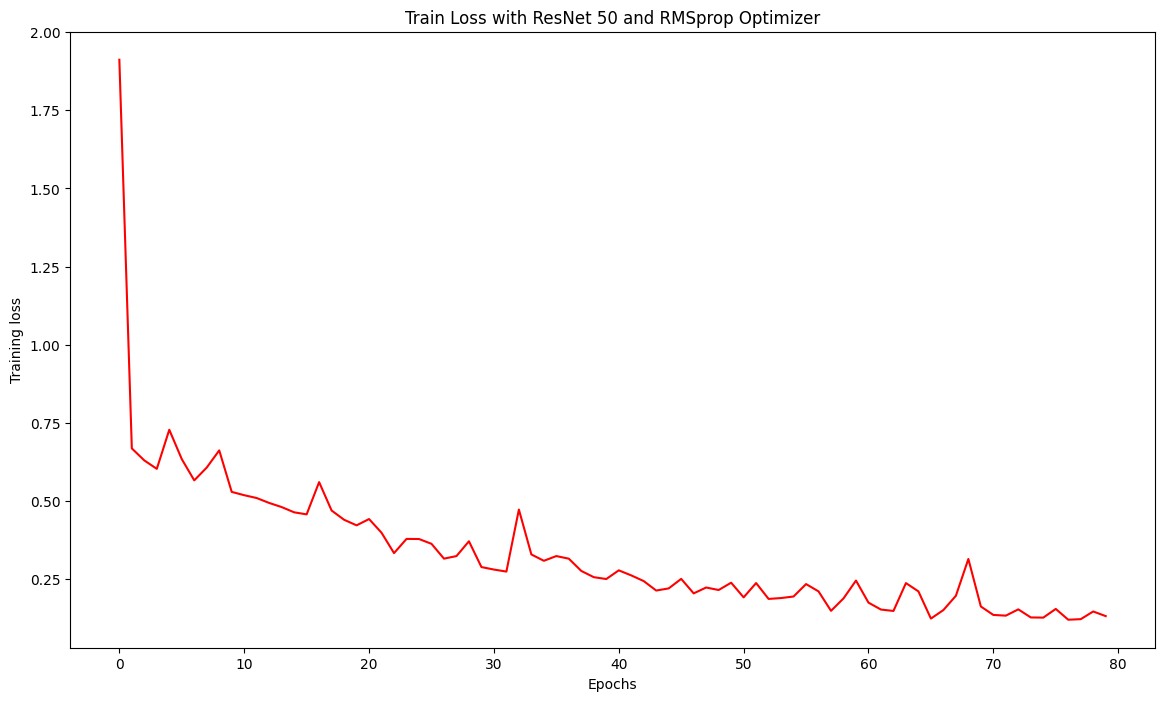

In [35]:
# Train Loss v Test Accuracy Plot_RMSprop Optimizer
plt.figure(figsize=(14,8))
plt.plot(train_loss_rms, color='r')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.title('Train Loss with ResNet 50 and RMSprop Optimizer')
plt.show()

In [94]:
# Saving ResNet50 model -> _RMSprop Optimizer
torch.save(resnet_prop.state_dict(), os.path.join(owd, 'ResNet50__RMSprop.pth'))

## ResNet 50 -> AdaBound Optimizer

In [97]:
model = resnet50(pretrained = True)
model.fc = nn.Linear(in_features=2048, out_features=2)
model = model.to(device)

# Initializing Optimizer
optimizer = tor_optim.AdaBound(
    model.parameters(),
    lr= 1e-3,
    betas= (0.9, 0.999),
    final_lr = 0.1,
    gamma=1e-3,
    eps= 1e-8,
    weight_decay=0,
    amsbound=False,
)

# Initializing Loss Function
loss_fn = nn.CrossEntropyLoss()

In [98]:
resnet_adb, train_loss_adb= train_model(model)

 25%|███████████████████▌                                                          | 70/280 [00:18<00:50,  4.14batch/s]

[1,    70] loss: 0.377


 50%|██████████████████████████████████████▌                                      | 140/280 [00:35<00:36,  3.87batch/s]

[1,   140] loss: 0.210


 69%|█████████████████████████████████████████████████████▎                       | 194/280 [00:49<00:21,  3.92batch/s]


KeyboardInterrupt: 

In [ ]:
# # Train Loss v Test Accuracy Plot_AdaBound
# plt.figure(figsize=(14,8))
# plt.plot(train_loss_adb,'-o', color='r')
# plt.plot(test_acc_adb,'-o', color='g')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy_Loss')
# plt.legend(['Train Loss','Test Accuracy'])
# plt.title('Train Loss vs Test Accuracy Plot_ResNet 50_AdaBound Optimizer')
# plt.show()

In [ ]:
# Saving ResNet50 model -> AdaBound Optimizer
torch.save(model.state_dict(), os.path.join(owd, 'ResNet50__AdaBound.pth'))

## ShuffleNet v2 with AdaBound Optimizer

In [36]:
# Loading pre-trained ShuffleNet v2 model
shufflenet = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=True)

Using cache found in C:\Users\abhis/.cache\torch\hub\pytorch_vision_v0.10.0


In [37]:
# Chaning the output layer of the shufflenet v2 model
shufflenet.fc = nn.Linear(in_features=1024, out_features=2)
shufflenet = shufflenet.to(device)

In [38]:
# Initializing Optimizer
optimizer = tor_optim.AdaBound(
    shufflenet.parameters(),
    lr= 1e-3,
    betas= (0.9, 0.999),
    final_lr = 0.1,
    gamma=1e-3,
    eps= 1e-8,
    weight_decay=0,
    amsbound=False,
)

# Initializing Loss Function
loss_fn = nn.CrossEntropyLoss()

In [39]:
shuffle_adb, train_loss_adb = train_model(shufflenet)

 25%|███████████████████▌                                                          | 70/280 [00:12<00:35,  5.94batch/s]

[1,    70] loss: 0.300


 50%|██████████████████████████████████████▊                                      | 141/280 [00:24<00:22,  6.22batch/s]

[1,   140] loss: 0.072


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:36<00:10,  6.42batch/s]

[1,   210] loss: 0.053


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:47<00:00,  5.84batch/s]


[1,   280] loss: 0.103


 25%|███████████████████▊                                                          | 71/280 [00:12<00:34,  6.11batch/s]

[2,    70] loss: 0.053


 50%|██████████████████████████████████████▊                                      | 141/280 [00:23<00:23,  5.86batch/s]

[2,   140] loss: 0.030


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:35<00:10,  6.44batch/s]

[2,   210] loss: 0.021


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:46<00:00,  5.97batch/s]


[2,   280] loss: 0.025


 25%|███████████████████▊                                                          | 71/280 [00:12<00:37,  5.65batch/s]

[3,    70] loss: 0.019


 50%|██████████████████████████████████████▊                                      | 141/280 [00:23<00:20,  6.74batch/s]

[3,   140] loss: 0.015


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:34<00:10,  6.57batch/s]

[3,   210] loss: 0.020


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:44<00:00,  6.26batch/s]


[3,   280] loss: 0.019


 25%|███████████████████▊                                                          | 71/280 [00:11<00:31,  6.69batch/s]

[4,    70] loss: 0.012


 50%|██████████████████████████████████████▊                                      | 141/280 [00:25<00:28,  4.81batch/s]

[4,   140] loss: 0.012


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:39<00:14,  4.85batch/s]

[4,   210] loss: 0.009


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:54<00:00,  5.18batch/s]


[4,   280] loss: 0.032


 25%|███████████████████▌                                                          | 70/280 [00:14<00:44,  4.67batch/s]

[5,    70] loss: 0.052


 50%|██████████████████████████████████████▊                                      | 141/280 [00:29<00:28,  4.94batch/s]

[5,   140] loss: 0.020


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:44<00:13,  4.95batch/s]

[5,   210] loss: 0.018


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:58<00:00,  4.79batch/s]


[5,   280] loss: 0.017


 25%|███████████████████▌                                                          | 70/280 [00:15<00:47,  4.46batch/s]

[6,    70] loss: 0.010


 50%|██████████████████████████████████████▌                                      | 140/280 [00:29<00:28,  4.86batch/s]

[6,   140] loss: 0.012


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:44<00:14,  4.87batch/s]

[6,   210] loss: 0.009


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:58<00:00,  4.78batch/s]


[6,   280] loss: 0.013


 25%|███████████████████▌                                                          | 70/280 [00:14<00:43,  4.86batch/s]

[7,    70] loss: 0.008


 50%|██████████████████████████████████████▌                                      | 140/280 [00:28<00:28,  4.87batch/s]

[7,   140] loss: 0.011


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:43<00:15,  4.65batch/s]

[7,   210] loss: 0.012


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:54<00:00,  5.10batch/s]


[7,   280] loss: 0.007


 25%|███████████████████▊                                                          | 71/280 [00:11<00:30,  6.93batch/s]

[8,    70] loss: 0.007


 50%|██████████████████████████████████████▊                                      | 141/280 [00:23<00:20,  6.65batch/s]

[8,   140] loss: 0.006


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:36<00:13,  5.04batch/s]

[8,   210] loss: 0.004


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:49<00:00,  5.70batch/s]


[8,   280] loss: 0.008


 25%|███████████████████▊                                                          | 71/280 [00:12<00:33,  6.17batch/s]

[9,    70] loss: 0.004


 50%|██████████████████████████████████████▌                                      | 140/280 [00:25<00:23,  6.04batch/s]

[9,   140] loss: 0.005


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:38<00:15,  4.62batch/s]

[9,   210] loss: 0.005


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:51<00:00,  5.39batch/s]


[9,   280] loss: 0.007


 25%|███████████████████▊                                                          | 71/280 [00:12<00:38,  5.41batch/s]

[10,    70] loss: 0.007


 50%|██████████████████████████████████████▌                                      | 140/280 [00:25<00:25,  5.57batch/s]

[10,   140] loss: 0.006


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:37<00:10,  6.41batch/s]

[10,   210] loss: 0.011


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:49<00:00,  5.67batch/s]


[10,   280] loss: 0.041


 25%|███████████████████▊                                                          | 71/280 [00:12<00:35,  5.83batch/s]

[11,    70] loss: 0.046


 50%|██████████████████████████████████████▊                                      | 141/280 [00:25<00:25,  5.44batch/s]

[11,   140] loss: 0.015


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:36<00:12,  5.77batch/s]

[11,   210] loss: 0.012


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:49<00:00,  5.67batch/s]


[11,   280] loss: 0.025


 25%|███████████████████▊                                                          | 71/280 [00:13<00:32,  6.37batch/s]

[12,    70] loss: 0.111


 50%|██████████████████████████████████████▊                                      | 141/280 [00:25<00:21,  6.46batch/s]

[12,   140] loss: 0.037


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:37<00:10,  6.73batch/s]

[12,   210] loss: 0.018


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:51<00:00,  5.48batch/s]


[12,   280] loss: 0.019


 25%|███████████████████▊                                                          | 71/280 [00:12<00:33,  6.28batch/s]

[13,    70] loss: 0.028


 50%|██████████████████████████████████████▊                                      | 141/280 [00:24<00:20,  6.68batch/s]

[13,   140] loss: 0.016


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:37<00:10,  6.29batch/s]

[13,   210] loss: 0.011


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:49<00:00,  5.62batch/s]


[13,   280] loss: 0.016


 25%|███████████████████▊                                                          | 71/280 [00:12<00:35,  5.91batch/s]

[14,    70] loss: 0.014


 50%|██████████████████████████████████████▊                                      | 141/280 [00:24<00:24,  5.61batch/s]

[14,   140] loss: 0.019


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:37<00:12,  5.48batch/s]

[14,   210] loss: 0.009


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:49<00:00,  5.64batch/s]


[14,   280] loss: 0.009


 25%|███████████████████▌                                                          | 70/280 [00:11<00:44,  4.68batch/s]

[15,    70] loss: 0.008


 50%|██████████████████████████████████████▊                                      | 141/280 [00:24<00:22,  6.18batch/s]

[15,   140] loss: 0.011


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:36<00:10,  6.85batch/s]

[15,   210] loss: 0.006


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:48<00:00,  5.82batch/s]


[15,   280] loss: 0.059


 25%|███████████████████▌                                                          | 70/280 [00:12<00:47,  4.41batch/s]

[16,    70] loss: 0.053


 50%|██████████████████████████████████████▌                                      | 140/280 [00:25<00:29,  4.79batch/s]

[16,   140] loss: 0.019


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:37<00:10,  6.71batch/s]

[16,   210] loss: 0.020


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:49<00:00,  5.70batch/s]


[16,   280] loss: 0.034


 25%|███████████████████▊                                                          | 71/280 [00:11<00:30,  6.84batch/s]

[17,    70] loss: 0.051


 50%|██████████████████████████████████████▊                                      | 141/280 [00:25<00:24,  5.60batch/s]

[17,   140] loss: 0.021


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:37<00:11,  5.88batch/s]

[17,   210] loss: 0.014


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:49<00:00,  5.66batch/s]


[17,   280] loss: 0.020


 25%|███████████████████▊                                                          | 71/280 [00:12<00:35,  5.91batch/s]

[18,    70] loss: 0.031


 50%|██████████████████████████████████████▊                                      | 141/280 [00:24<00:24,  5.70batch/s]

[18,   140] loss: 0.010


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:36<00:12,  5.73batch/s]

[18,   210] loss: 0.019


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:48<00:00,  5.76batch/s]


[18,   280] loss: 0.015


 25%|███████████████████▊                                                          | 71/280 [00:12<00:37,  5.53batch/s]

[19,    70] loss: 0.024


 50%|██████████████████████████████████████▊                                      | 141/280 [00:23<00:22,  6.29batch/s]

[19,   140] loss: 0.012


 75%|██████████████████████████████████████████████████████████                   | 211/280 [00:37<00:13,  5.15batch/s]

[19,   210] loss: 0.009


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:47<00:00,  5.84batch/s]


[19,   280] loss: 0.006


 25%|███████████████████▌                                                          | 70/280 [00:13<00:48,  4.35batch/s]

[20,    70] loss: 0.008


 50%|██████████████████████████████████████▌                                      | 140/280 [00:28<00:30,  4.61batch/s]

[20,   140] loss: 0.005


 75%|█████████████████████████████████████████████████████████▊                   | 210/280 [00:43<00:14,  4.80batch/s]

[20,   210] loss: 0.006


100%|█████████████████████████████████████████████████████████████████████████████| 280/280 [00:58<00:00,  4.81batch/s]

[20,   280] loss: 0.016


In [40]:
test_model(shuffle_adb)

Accuracy of the network on the test images: 96 %


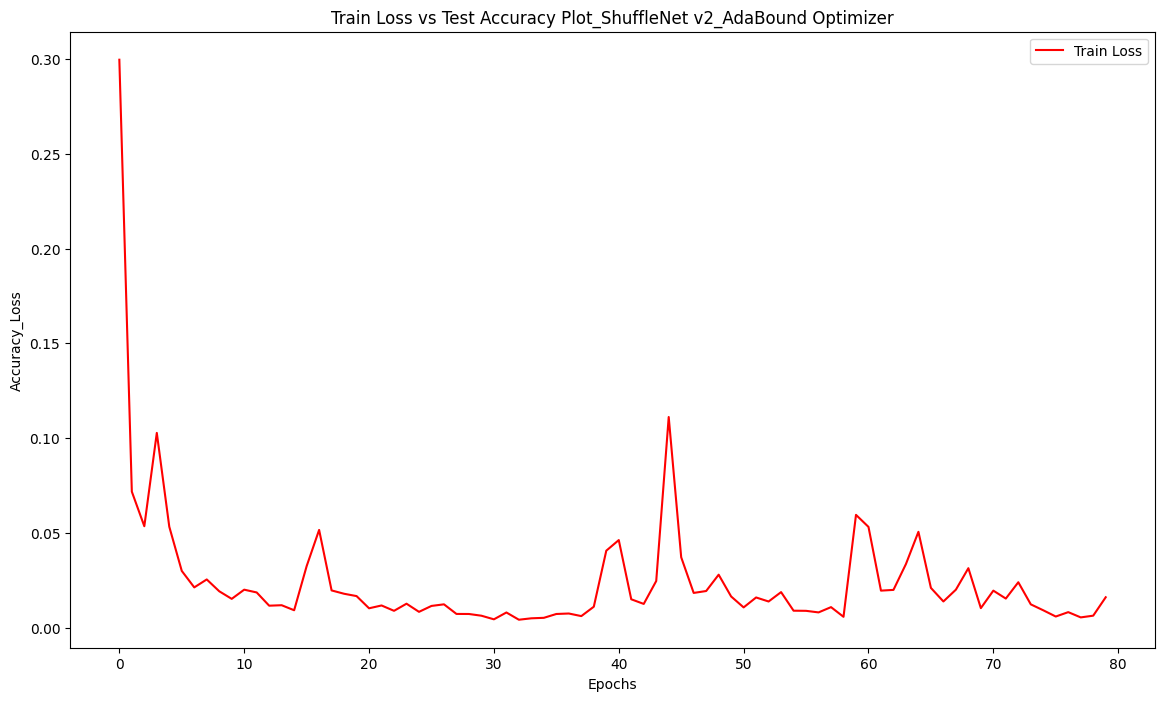

In [41]:
# Train Loss v Test Accuracy Plot_AdaBound
plt.figure(figsize=(14,8))
plt.plot(train_loss_adb, color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy_Loss')
plt.legend(['Train Loss','Test Accuracy'])
plt.title('Train Loss vs Test Accuracy Plot_ShuffleNet v2_AdaBound Optimizer')
plt.show()

In [118]:
# Saving ShuffleNet v2 model -> AdaBound Optimizer
torch.save(shuffle_adb.state_dict(), os.path.join(owd, 'ShuffleNet v2__AdaBound.pth'))

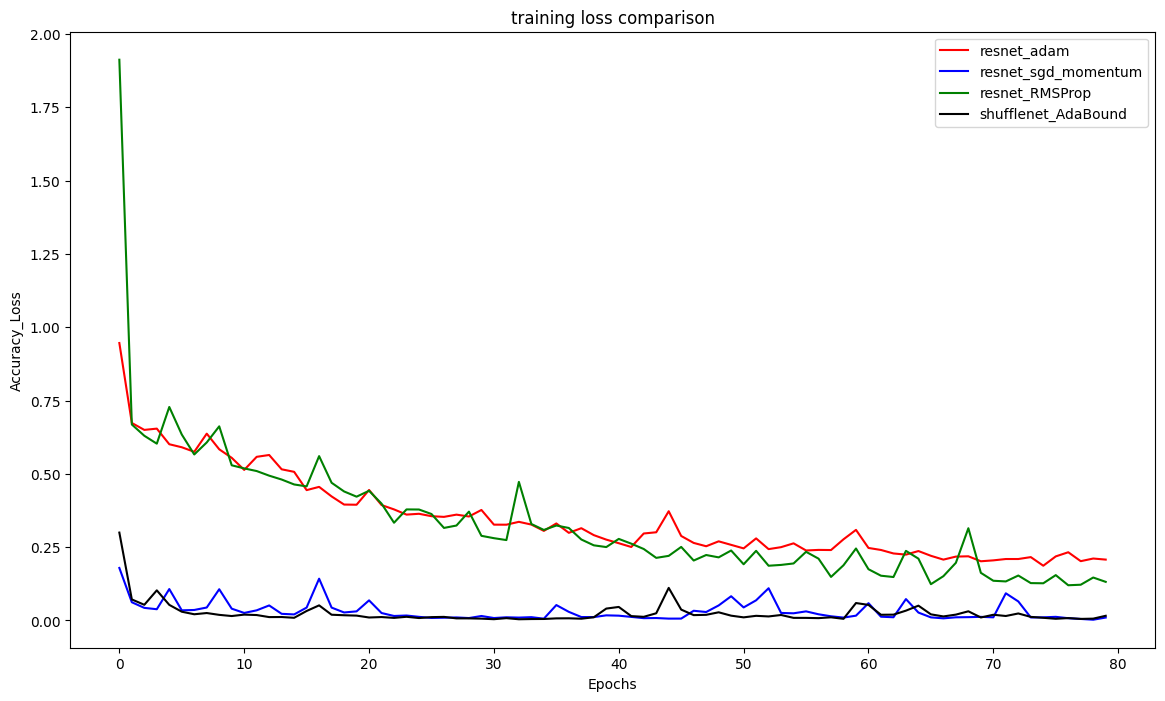

In [42]:
plt.figure(figsize=(14,8))
plt.plot(train_loss_adam, color='r')
plt.plot(train_loss_sgd, color='blue')
plt.plot(train_loss_rms, color='g')
plt.plot(train_loss_adb, color='black')
plt.xlabel('Epochs')
plt.ylabel('Accuracy_Loss')
plt.legend(['resnet_adam','resnet_sgd_momentum', 'resnet_RMSProp','shufflenet_AdaBound'])
plt.title('training loss comparison')
plt.show()
